In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models
import seaborn as sns

In [3]:
plt.style.use('../paper/paper.mplstyle')
double_textwidth = 7.0 #inches
single_textwidth = 3.5 #inches

In [4]:
fid_theta = [10.5, 2.0, 0.0, 0.0, 0.2, 0.0]
meta_path = "../../../data/MW-analog/meta_data_psi3/"

selecting the 43rd saga index to be the data

In [ ]:
ind = 43
modeldir = "../../mcmc/inference_tests/convergence/mock_1/Nhost_100/"
mock_1_N100 = jsm_models.SAMPLE_SAGA_NEW(fid_theta=fid_theta, meta_path=meta_path, SAGA_ind=ind, Nhost_M=100, savedir=None, savemodel=modeldir, plot=False) 
print(mock_1_N100.lgMh_models.shape)

modeldir = "../../mcmc/inference_tests/convergence/mock_1/Nhost_1000/"
mock_1_N1000 = jsm_models.SAMPLE_SAGA_NEW(fid_theta=fid_theta, meta_path=meta_path, SAGA_ind=ind, Nhost_M=1000, savedir=None, savemodel=modeldir, plot=False)
print(mock_1_N1000.lgMh_models.shape) 

datadir = "../../mcmc/inference_tests/convergence/mock_1/Nhost_10000/"
mock_1_N10000 = jsm_models.SAMPLE_SAGA_NEW(fid_theta=fid_theta, meta_path=meta_path, SAGA_ind=ind, Nhost_M=None, savedir=datadir, savemodel=datadir, plot=True) 
print(mock_1_N10000.lgMh_models.shape) 

selecting the 89th saga index to be the data

In [ ]:
ind = 89
modeldir = "../../mcmc/inference_tests/convergence/mock_2/Nhost_100/"
mock_2_N100 = jsm_models.SAMPLE_SAGA_NEW(fid_theta=fid_theta, meta_path=meta_path, SAGA_ind=ind, Nhost_M=100, savedir=None, savemodel=modeldir, plot=False) 
print(mock_2_N100.lgMh_models.shape)

modeldir = "../../mcmc/inference_tests/convergence/mock_2/Nhost_1000/"
mock_2_N1000 = jsm_models.SAMPLE_SAGA_NEW(fid_theta=fid_theta, meta_path=meta_path, SAGA_ind=ind, Nhost_M=1000, savedir=None, savemodel=modeldir, plot=False)
print(mock_2_N1000.lgMh_models.shape) 

datadir = "../../mcmc/inference_tests/convergence/mock_2/Nhost_10000/"
mock_2_N10000 = jsm_models.SAMPLE_SAGA_NEW(fid_theta=fid_theta, meta_path=meta_path, SAGA_ind=ind, Nhost_M=None, savedir=datadir, savemodel=datadir, plot=True) 
print(mock_2_N10000.lgMh_models.shape) 

selecting the 11th saga index to be the data

In [ ]:
ind = 72
modeldir = "../../mcmc/inference_tests/convergence/mock_3/Nhost_100/"
mock_3_N100 = jsm_models.SAMPLE_SAGA_NEW(fid_theta=fid_theta, meta_path=meta_path, SAGA_ind=ind, Nhost_M=100, savedir=None, savemodel=modeldir, plot=False) 
print(mock_3_N100.lgMh_models.shape)

modeldir = "../../mcmc/inference_tests/convergence/mock_3/Nhost_1000/"
mock_3_N1000 = jsm_models.SAMPLE_SAGA_NEW(fid_theta=fid_theta, meta_path=meta_path, SAGA_ind=ind, Nhost_M=1000, savedir=None, savemodel=modeldir, plot=False)
print(mock_3_N1000.lgMh_models.shape) 

datadir = "../../mcmc/inference_tests/convergence/mock_3/Nhost_10000/"
mock_3_N10000 = jsm_models.SAMPLE_SAGA_NEW(fid_theta=fid_theta, meta_path=meta_path, SAGA_ind=ind, Nhost_M=None, savedir=datadir, savemodel=datadir, plot=True)
print(mock_3_N10000.lgMh_models.shape) 

In [5]:
ds0 = np.load("../../mcmc/inference_tests/convergence/data_saves/drop_S0.npy")
ds15 = np.load("../../mcmc/inference_tests/convergence/data_saves/drop_S15.npy")
ds30 = np.load("../../mcmc/inference_tests/convergence/data_saves/drop_S30.npy")

In [6]:
class clean_up():

    def __init__(self, drop_data):
        self.drop_data = drop_data
        self.median = np.nanmedian(1-self.drop_data, axis=0)
        self.std = np.nanstd(1-self.drop_data, axis=0)
        upper = self.median + self.std
        upper[upper > 1] = 1
        self.upper = upper
        lower = self.median - self.std
        lower[lower < 0] = 0
        self.lower = lower

In [7]:
Nhost = np.logspace(1.1,3, 25).astype(int)

data_s0 = clean_up(ds0)
data_s15 = clean_up(ds15)
data_s30 = clean_up(ds30)

In [8]:
data_s0.median = np.append(data_s0.median, 1)
data_s0.upper = np.append(data_s0.upper, 1)
data_s0.lower = np.append(data_s0.lower, 1-0.147)

In [9]:
data_s15.median = np.append(data_s15.median, 1)
data_s15.upper = np.append(data_s15.upper, 1)
data_s15.lower = np.append(data_s15.lower, 1-0.255)

In [10]:
data_s30.median = np.append(data_s30.median, 0.5)
data_s30.upper = np.append(data_s30.upper, 0.8)
data_s30.lower = np.append(data_s30.lower, 0.2)

In [11]:
Nhost = np.append(Nhost, 2000)

In [12]:
import numpy as np
from scipy.special import comb
from scipy.optimize import curve_fit


def smoothstep(x, x_max):
    N = 1  # Fixed value
    x_min = 0
    x = np.clip((x - x_min) / (x_max - x_min), 0, 1)
    result = 0
    for n in range(0, N + 1):
        result += comb(N + n, n) * comb(2 * N + 1, N - n) * (-x) ** n
    result *= x ** (N + 1)
    return result

def fit(x_data, y_data, initial_guess):

    xsmooth = np.logspace(1,4,100)

    popt, pcov = curve_fit(smoothstep, x_data, y_data, p0=initial_guess)
    # Generate a smooth curve based on the best fit parameters
    ysmooth = smoothstep(xsmooth, *popt)

    return ysmooth

In [13]:
xsmooth = np.logspace(1,4,100)
init_s0 = 3300
init_s15 = 620
init_s30 = 350

ysmooth_s0 = fit(Nhost, data_s0.median, init_s0)
ysmooth_s15 = fit(Nhost, data_s15.median, init_s15)
ysmooth_s30 = fit(Nhost, data_s30.median, init_s30)

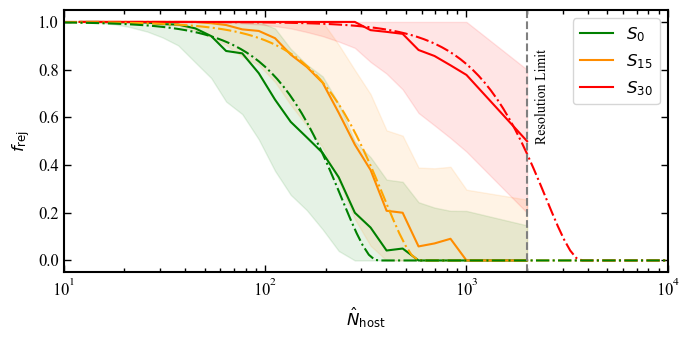

In [20]:
fig, ax_bottom = plt.subplots(figsize=(double_textwidth,single_textwidth))

ax_bottom.fill_between(Nhost, 1-data_s0.upper, 1-data_s0.lower, alpha=0.1, color="green")
ax_bottom.fill_between(Nhost, 1-data_s15.upper, 1-data_s15.lower, alpha=0.1, color="darkorange")
ax_bottom.fill_between(Nhost, 1-data_s30.upper, 1-data_s30.lower, alpha=0.1, color="red")

ax_bottom.plot(Nhost, 1-data_s0.median, color="green", label="$S_0$")
ax_bottom.plot(Nhost, 1-data_s15.median, color="darkorange", label="$S_{15}$")
ax_bottom.plot(Nhost, 1-data_s30.median, color="red", label="$S_{30}$")
ax_bottom.legend()


ax_bottom.set_xscale("log")
ax_bottom.set_xlim(10, 1e4)

ax_bottom.plot(xsmooth, 1-ysmooth_s30, color="red", ls="-.")
ax_bottom.plot(xsmooth, 1-ysmooth_s15, color="orange", ls="-.")
ax_bottom.plot(xsmooth,1- ysmooth_s0, color="green", ls="-.")

ax_bottom.axvline(2000, color="grey", ls="--")
ax_bottom.text(2200, 0.5, "Resolution Limit", rotation=90)

# # Create a new axis for the top x-axis
# ax_top = ax_bottom.twiny()

# # Invert the scale for the top x-axis (logarithmic)
# ax_top.set_xscale("log")
# ax_top.set_xlim(10**3, 1)

ax_bottom.set_xlabel("$\\hat{N}_{\mathrm{host}}$")
ax_bottom.set_ylabel("$f_{\mathrm{rej}}$")
plt.tight_layout()
plt.savefig("../../../paper_1/figures/aux/convergence.pdf", bbox_inches="tight")
plt.show()